# 彩色图像处理

在之前的各章中，我们介绍的都是灰度图像的处理：这种图像是简单的，可以视作一个矩阵，也可以视作一个随机变量，还可以视作一个二维的信号。用不同的方法处理灰度图像就要将其视作不同的对象。而彩色图像要复杂一点，色彩分布在整个可见光的频域，一个像素点要处理的信息就多了很多，而灰度图像只需要处理灰度这一个分量就好。

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import cv2 as cv

## 彩色基础

三原色，是色彩的三个分量，它们分别是：蓝色=435.8nm，绿色=546.1nm，红色=700nm，它们以不同的强度线性相加就可以得到**几乎**所有可见的颜色。当然还有其他的分量，保证了可以真的得到**所有**可见的颜色。这样的话，一张彩色图像的每一个像素点都可以表示为一个有序3元组，换句话说，一张彩色图像就是三张灰度矩阵的叠加

从像素点来看，一个颜色是处在3维空间中的一个点，这种想法在理解彩色图像处理方面是很有用的。

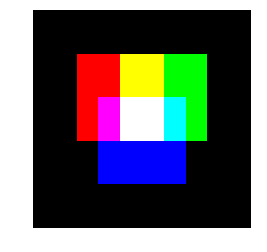

In [27]:
mat = np.zeros((500, 500, 3))
mat[100:300, 100:300] += np.array([1., 0., 0.])
mat[100:300, 200:400] += np.array([0., 1., 0.])
mat[200:400, 150:350] += np.array([0., 0., 1.])
plt.imshow(mat), plt.axis('off')
plt.show()

## 彩色模型

彩色模型的目的是，在某些标准下用通常可以接受的方式方便地对彩色加以说明。本质上，彩色模型是坐标系统和子空间的说明，其中，位于系统中的每种颜色都由单个点来表示。

现在所用的大多数彩色模型不是面向硬件的，就是面向应用的。在数字图像处理中，实际中最通用的模型如下：面向硬件的RGB模型，用于彩色监视器等；CMY模型和CMYK模型，用于色彩打印机；HSI模型（色调、饱和度、亮度），这种模型更符合人描述和解释颜色的方式。另外，HSI模型还有另一个优点，它可以解除图像中颜色和灰度信息的联系，使其更合适用灰度处理的方法来处理。

In [30]:
img = cv.imread('lena.jpg')
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)

### RGB

RGB模型在理解上是简单的，当每个颜色由24bit表示的时候，一个分量就有$2^8$种分度值，而可以表示的总颜色数量就是$(2^8)^3$种，但是在实际情况里，系统只会用256种颜色。这一点可以先不用在意

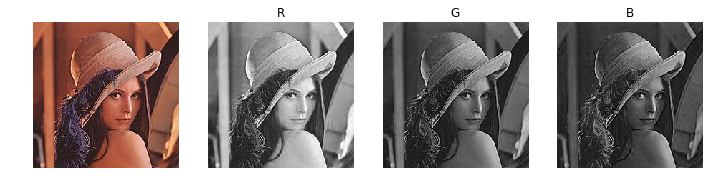

In [35]:
plt.figure(figsize = (12, 3))
plt.subplot(141), plt.imshow(img), plt.axis('off')
plt.subplot(142), plt.imshow(img[:, :, 0], cmap = 'gray'), plt.axis('off'), plt.title('R')
plt.subplot(143), plt.imshow(img[:, :, 1], cmap = 'gray'), plt.axis('off'), plt.title('G')
plt.subplot(144), plt.imshow(img[:, :, 2], cmap = 'gray'), plt.axis('off'), plt.title('B')
plt.show()

### CMY

CMY模型相当于是RGB的反色，用三元组表示为$(C\ M\ Y)=(1\ 1\ 1)-(R\ G\ B)$

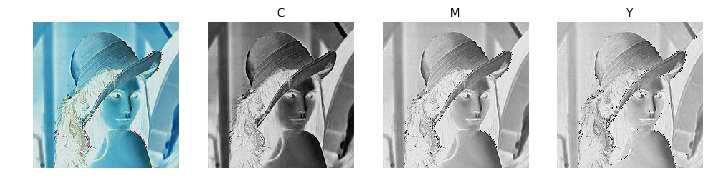

In [38]:
plt.figure(figsize = (12, 3))
plt.subplot(141), plt.imshow(1 - img), plt.axis('off')
plt.subplot(142), plt.imshow((1 - img)[:, :, 0], cmap = 'gray'), plt.axis('off'), plt.title('C')
plt.subplot(143), plt.imshow((1 - img)[:, :, 1], cmap = 'gray'), plt.axis('off'), plt.title('M')
plt.subplot(144), plt.imshow((1 - img)[:, :, 2], cmap = 'gray'), plt.axis('off'), plt.title('Y')
plt.show()

### HSI

这种模型的转换要复杂一点，这里只给出转换关系，具体的推导略去

1. RGB->HSI

色调
$$
H = \theta\qquad B\leq G\\
H = 360 - \theta\qquad B > G\\
\theta = \arccos (\frac{(R - G) + (R - B)}{2\sqrt{(R - G)^2 + (R - B)(G - B)}})
$$

饱和度
$$
S = 1 - \frac{3}{R + G + B}min(R, G, B)
$$

强度
$$
I = \frac 1 3 (R + G + B)
$$

In [51]:
def RGB2HSI(pic):
    r, c, _ = pic.shape
    res = pic.copy()
    mat_a,  mat_b = np.sum(res, axis = 2), np.min(res, axis = 2)
    for k in range(r):
        for j in range(c):
            r, g, b = pic[k, j]
            theta = np.arccos(0.5 * (2 * r - g - b) / np.sqrt(r * r + g * g + b * b - r * g - r * b - b * g))
            h, s, i = theta if b <= g else (360 - theta), 1 - 3 / mat_a[k, j] * mat_b[k, j], 1 / 3 * mat_a[k, j]
            res[k, j] = np.array([h, s, i])
    return res

e:\python36\lib\site-packages\ipykernel_launcher.py:8: RuntimeWarning: overflow encountered in ubyte_scalars
  
e:\python36\lib\site-packages\ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in arccos
  
e:\python36\lib\site-packages\ipykernel_launcher.py:8: RuntimeWarning: divide by zero encountered in double_scalars
  
e:\python36\lib\site-packages\ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in double_scalars
  


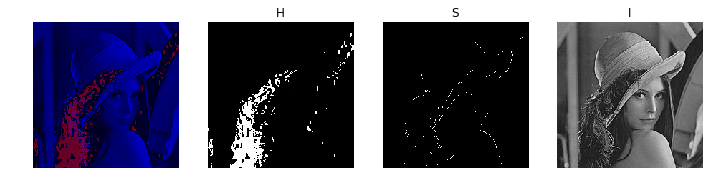

In [53]:
t = RGB2HSI(img)
plt.figure(figsize = (12, 3))
plt.subplot(141), plt.imshow(t), plt.axis('off')
plt.subplot(142), plt.imshow(t[:, :, 0], cmap = 'gray'), plt.axis('off'), plt.title('H')
plt.subplot(143), plt.imshow(t[:, :, 1], cmap = 'gray'), plt.axis('off'), plt.title('S')
plt.subplot(144), plt.imshow(t[:, :, 2], cmap = 'gray'), plt.axis('off'), plt.title('I')
plt.show()

2. HSI->RGB

R
$$
R = I(1 - S)
$$

G
$$
G = I[1 + \frac{S\cos H}{\cos(\frac{\pi}{3} - H)}]
$$

B
$$
B = 3I - (R + G)
$$

## 伪彩色图像处理

伪彩色图像处理是指基于一种指定的规则对灰度值赋以颜色的处理。像在`plt.imshow`函数中的`cmap`参数就规定了由灰度到图像的不同映射方法，为灰度图像赋予颜色，在许多时候可以给人更加直观的感受，比如说气象图像、热度图等等。

## 全彩色图像处理基础

全彩色图像处理的关键就是将一个像素点视作一个三维向量，任何对彩色图像的处理都可以建模为对这个三维向量的变换

## 彩色变换

这一节中涉及到的彩色变换是指在单一彩色模型内处理彩色图像的分量，而不是在不同彩色模型之间进行转换

## 彩色分层

## 平滑和锐化

## 基于彩色的图像分割

## 彩色图像中的噪声

## 彩色图像压缩